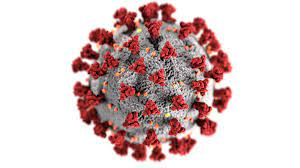

In [ ]:
## Graphical of Corona Virus

import os
from IPython.display import Image
Image(filename = "CVP.png", width=900, height=900)


In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from datetime import datetime

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

# import sys
# !conda list Check the packages installed

In [2]:
# Loading the cumulative raw data

raw_data_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
raw_data_deaths = pd.read_csv('time_series_covid19_deaths_global.csv')
raw_data_Recovered = pd.read_csv('time_series_covid19_recovered_global.csv')

print("The Shape of Cornirmed is: ", raw_data_confirmed.shape)
print("The Shape of Cornirmed is: ", raw_data_deaths.shape)
print("The Shape of Cornirmed is: ", raw_data_Recovered.shape)

raw_data_confirmed.head()

The Shape of Cornirmed is:  (285, 956)
The Shape of Cornirmed is:  (285, 956)
The Shape of Cornirmed is:  (270, 956)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,190643,191040,191247,191585,191967,191967,191967,192463,192906,193004
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,326077,326181,326787,327232,327607,327961,328299,328515,328571,329017
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,269805,269894,269971,270043,270097,270145,270175,270194,270235,270272
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,45975,45975,45975,46027,46027,46027,46027,46027,46027,46027
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636


In [3]:
raw_data_Recovered[raw_data_Recovered['Country/Region'] == 'US']


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22,8/30/22
242,NaN,US,40.0,-100.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Un-Pivoting the data

raw_data_confirmed2 = pd.melt(raw_data_confirmed, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name=['Date'])
raw_data_deaths2 = pd.melt(raw_data_deaths, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name=['Date'])
raw_data_Recovered2 = pd.melt(raw_data_Recovered, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name=['Date'])


print("The Shape of Cornirmed is: ", raw_data_confirmed2.shape)
print("The Shape of Cornirmed is: ", raw_data_deaths2.shape)
print("The Shape of Cornirmed is: ", raw_data_Recovered2.shape)


raw_data_confirmed2.head()

The Shape of Cornirmed is:  (271320, 6)
The Shape of Cornirmed is:  (271320, 6)
The Shape of Cornirmed is:  (257040, 6)


,Province/State,Country/Region,Lat,Long,Date,value
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [5]:
# Converting the new column to dates

raw_data_confirmed2['Date'] = pd.to_datetime(raw_data_confirmed2['Date'])
raw_data_deaths2['Date'] = pd.to_datetime(raw_data_deaths2['Date'])
raw_data_Recovered2['Date'] = pd.to_datetime(raw_data_Recovered2['Date'])

In [6]:
# Renaming the Values
raw_data_confirmed2.columns = raw_data_confirmed2.columns.str.replace('value', 'Confirmed')
raw_data_deaths2.columns = raw_data_deaths2.columns.str.replace('value', 'Deaths')
raw_data_Recovered2.columns = raw_data_Recovered2.columns.str.replace('value', 'Recovered')

In [7]:
# Investigating the NULL values
raw_data_Recovered2.isnull().sum()

Province/State    187544
Country/Region         0
Lat                  952
Long                 952
Date                   0
Recovered              0
dtype: int64

In [8]:
# Dealing with NULL values

raw_data_confirmed2['Province/State'].fillna(raw_data_confirmed2['Country/Region'], inplace=True)
raw_data_deaths2['Province/State'].fillna(raw_data_deaths2['Country/Region'], inplace=True)
raw_data_Recovered2['Province/State'].fillna(raw_data_Recovered2['Country/Region'], inplace=True)

raw_data_confirmed2.isnull().sum()

Province/State       0
Country/Region       0
Lat               1904
Long              1904
Date                 0
Confirmed            0
dtype: int64

In [9]:
# printing shapes before the join
print("The Shape of Cornirmed is: ", raw_data_confirmed2.shape)
print("The Shape of Cornirmed is: ", raw_data_deaths2.shape)
print("The Shape of Cornirmed is: ", raw_data_Recovered2.shape)

The Shape of Cornirmed is:  (271320, 6)
The Shape of Cornirmed is:  (271320, 6)
The Shape of Cornirmed is:  (257040, 6)


In [10]:
raw_data_confirmed2.isnull().sum()
raw_data_deaths2.isnull().sum()
raw_data_Recovered2.isnull().sum()


Province/State      0
Country/Region      0
Lat               952
Long              952
Date                0
Recovered           0
dtype: int64

In [11]:
# Full Joins

# Confirmed with Deaths
full_join = raw_data_confirmed2.merge(raw_data_deaths2[['Province/State','Country/Region','Date','Deaths']], 
                                      how = 'left', 
                                      left_on = ['Province/State','Country/Region','Date'], 
                                      right_on = ['Province/State', 'Country/Region','Date'])

print("Shape of first join: ", full_join.shape)

# full join with Recovered
full_join = full_join.merge(raw_data_Recovered2[['Province/State','Country/Region','Date','Recovered']], 
                                      how = 'left', 
                                      left_on = ['Province/State','Country/Region','Date'], 
                                      right_on = ['Province/State', 'Country/Region','Date'])

print("Shape of second join: ", full_join.shape)

full_join.head()

Shape of first join:  (271320, 7)
Shape of second join:  (271320, 8)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0.0
1,Albania,Albania,41.15330,20.168300,2020-01-22,0,0,0.0
2,Algeria,Algeria,28.03390,1.659600,2020-01-22,0,0,0.0
3,Andorra,Andorra,42.50630,1.521800,2020-01-22,0,0,0.0
4,Angola,Angola,-11.20270,17.873900,2020-01-22,0,0,0.0


In [12]:
# checking for null values (especially long and lat)
full_join.isnull().sum()

Province/State        0
Country/Region        0
Lat                1904
Long               1904
Date                  0
Confirmed             0
Deaths                0
Recovered         15232
dtype: int64

In [13]:
# Adding Month and Year as a new Column
full_join['Month-Year'] = full_join['Date'].dt.strftime('%b-%Y')

In [14]:
full_join.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year
0,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0.0,Jan-2020
1,Albania,Albania,41.15330,20.168300,2020-01-22,0,0,0.0,Jan-2020
2,Algeria,Algeria,28.03390,1.659600,2020-01-22,0,0,0.0,Jan-2020
3,Andorra,Andorra,42.50630,1.521800,2020-01-22,0,0,0.0,Jan-2020
4,Angola,Angola,-11.20270,17.873900,2020-01-22,0,0,0.0,Jan-2020


In [15]:
# Setting my path
#path = "C:\\Users\\pitsi\\Desktop\\Python Tutorials\\CoronaVirus\\raw data"

# Changing my CWD
#os.chdir(path)


#df_list = []
#for file in os.listdir('C:\\Users\\pitsi\\Desktop\\Python Tutorials\\CoronaVirus\\raw data'):
#    df = pd.read_csv(file)
#    df_list.append(df)
#    final_df = pd.concat(df_list)

#print("The shape of final df is: ", final_df.shape)

In [16]:
#############################################################################################
######################## Braking the numbers by Day #########################################
#############################################################################################

# filtering data to Anhui to give you an example

#creating a new df    
test = full_join[full_join['Province/State'] == 'Anhui']

#creating a new df    
full_join2 = test.copy()

#creating a new date columns - 1
full_join2['Date - 1'] = full_join2['Date'] + pd.Timedelta(days=1)
full_join2.rename(columns={'Confirmed': 'Confirmed - 1', 'Deaths': 'Deaths - 1', 'Recovered': 'Recovered - 1',
                          'Date': 'Date Minus 1'}, inplace=True)

#Joing on the 2 DFs
full_join3 = test.merge(full_join2[['Province/State', 'Country/Region','Confirmed - 1', 'Deaths - 1', 
                            'Recovered - 1', 'Date - 1', 'Date Minus 1']], how = 'outer',
                             left_on = ['Province/State','Country/Region','Date'], 
                             right_on = ['Province/State', 'Country/Region','Date - 1'])

# Additional Calculations
full_join3['Confirmed Daily'] = full_join3['Confirmed'] - full_join3['Confirmed - 1']


test.head()
full_join2.head()
full_join3.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed - 1,Deaths - 1,Recovered - 1,Date - 1,Date Minus 1,Confirmed Daily
0,Anhui,China,31.8257,117.2264,2020-01-22,1.0,0.0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN
1,Anhui,China,31.8257,117.2264,2020-01-23,9.0,0.0,0.0,Jan-2020,1.0,0.0,0.0,2020-01-23,2020-01-22,8.0
2,Anhui,China,31.8257,117.2264,2020-01-24,15.0,0.0,0.0,Jan-2020,9.0,0.0,0.0,2020-01-24,2020-01-23,6.0
3,Anhui,China,31.8257,117.2264,2020-01-25,39.0,0.0,0.0,Jan-2020,15.0,0.0,0.0,2020-01-25,2020-01-24,24.0
4,Anhui,China,31.8257,117.2264,2020-01-26,60.0,0.0,0.0,Jan-2020,39.0,0.0,0.0,2020-01-26,2020-01-25,21.0


In [17]:
test.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year
59,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0.0,Jan-2020
344,Anhui,China,31.8257,117.2264,2020-01-23,9,0,0.0,Jan-2020
629,Anhui,China,31.8257,117.2264,2020-01-24,15,0,0.0,Jan-2020
914,Anhui,China,31.8257,117.2264,2020-01-25,39,0,0.0,Jan-2020
1199,Anhui,China,31.8257,117.2264,2020-01-26,60,0,0.0,Jan-2020


In [18]:
full_join2.head()

,Province/State,Country/Region,Lat,Long,Date Minus 1,Confirmed - 1,Deaths - 1,Recovered - 1,Month-Year,Date - 1
59,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0.0,Jan-2020,2020-01-23
344,Anhui,China,31.8257,117.2264,2020-01-23,9,0,0.0,Jan-2020,2020-01-24
629,Anhui,China,31.8257,117.2264,2020-01-24,15,0,0.0,Jan-2020,2020-01-25
914,Anhui,China,31.8257,117.2264,2020-01-25,39,0,0.0,Jan-2020,2020-01-26
1199,Anhui,China,31.8257,117.2264,2020-01-26,60,0,0.0,Jan-2020,2020-01-27


In [19]:
#############################################################################################
######################## Braking the numbers by Day #########################################
#############################################################################################

## Applying it on all dataset

#creating a new df    
full_join2 = full_join.copy()

#creating a new date columns - 1
full_join2['Date - 1'] = full_join2['Date'] + pd.Timedelta(days=1)
full_join2.rename(columns={'Confirmed': 'Confirmed - 1', 'Deaths': 'Deaths - 1', 'Recovered': 'Recovered - 1',
                          'Date': 'Date Minus 1'}, inplace=True)

#Joing on the 2 DFs
full_join3 = full_join.merge(full_join2[['Province/State', 'Country/Region','Confirmed - 1', 'Deaths - 1', 
                            'Recovered - 1', 'Date - 1', 'Date Minus 1']], how = 'left',
                             left_on = ['Province/State','Country/Region','Date'], 
                             right_on = ['Province/State', 'Country/Region','Date - 1'])

#minus_onedf.rename(columns={'Confirmed': 'Confirmed - 1', 'Deaths': 'Deaths - 1', 'Recovered': 'Recovered - 1'}, inplace=True)

full_join3.head()

# Additional Calculations
full_join3['Confirmed Daily'] = full_join3['Confirmed'] - full_join3['Confirmed - 1']
full_join3['Deaths Daily'] = full_join3['Deaths'] - full_join3['Deaths - 1']
full_join3['Recovered Daily'] = full_join3['Recovered'] - full_join3['Recovered - 1']

print(full_join3.shape)

(271320, 17)


In [20]:
full_join3.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed - 1,Deaths - 1,Recovered - 1,Date - 1,Date Minus 1,Confirmed Daily,Deaths Daily,Recovered Daily
0,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
1,Albania,Albania,41.15330,20.168300,2020-01-22,0,0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
2,Algeria,Algeria,28.03390,1.659600,2020-01-22,0,0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
3,Andorra,Andorra,42.50630,1.521800,2020-01-22,0,0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
4,Angola,Angola,-11.20270,17.873900,2020-01-22,0,0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN


In [21]:
# Additing manually the numbers for first day

full_join3['Confirmed Daily'].loc[full_join3['Date'] == '2020-01-22'] = full_join3['Confirmed']
full_join3['Deaths Daily'].loc[full_join3['Date'] == '2020-01-22'] = full_join3['Deaths']
full_join3['Recovered Daily'].loc[full_join3['Date'] == '2020-01-22'] = full_join3['Recovered']

# deleting columns
del full_join3['Confirmed - 1']
del full_join3['Deaths - 1']
del full_join3['Recovered - 1']
del full_join3['Date - 1']
del full_join3['Date Minus 1']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [22]:
# Creating additional slicer for easy of use

full_join3['Hubei Vs Rest of the World'] = 'Rest of the World'
full_join3['Hubei Vs Rest of the World'].loc[full_join3['Province/State'] == 'Hubei'] = 'Hubei - Virus birth'

#full_join3[full_join3['Province/State'] == 'Hubei']

In [23]:
full_join3.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed Daily,Deaths Daily,Recovered Daily,Hubei Vs Rest of the World
0,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World
1,Albania,Albania,41.15330,20.168300,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World
2,Algeria,Algeria,28.03390,1.659600,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World
3,Andorra,Andorra,42.50630,1.521800,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World
4,Angola,Angola,-11.20270,17.873900,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World


In [24]:
# Exporting the data

# Setting my path


full_join3.to_csv('CoronaVirus PowerBI Raw', sep='\t')